<a href="https://colab.research.google.com/github/snehatanti/interns-code/blob/main/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d prasanth122/gender-submission

  0% 0.00/1.98k [00:00<?, ?B/s]
100% 1.98k/1.98k [00:00<00:00, 3.65MB/s]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gender-submission.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
titanic_data=pd.read_csv('/content/train1.csv')

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.shape

(891, 12)

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic_data["Age"].fillna(titanic_data["Age"].mean,inplace=True)

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [19]:
print(titanic_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [21]:
print(titanic_data["Embarked"].mode()[0])

S


In [22]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [23]:
titanic_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [24]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
sns.set()

In [26]:
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

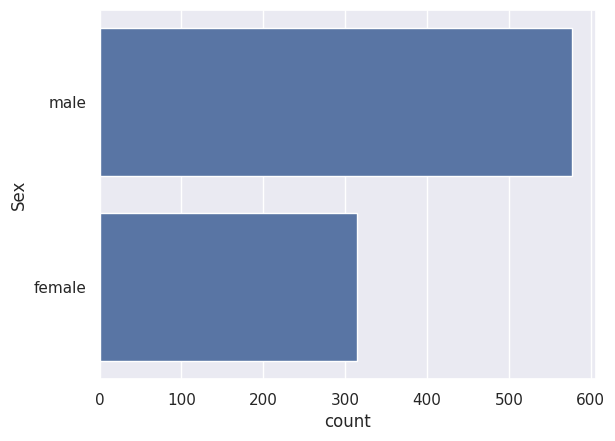

In [27]:
sns.countplot(titanic_data["Sex"])

<Axes: xlabel='Sex', ylabel='count'>

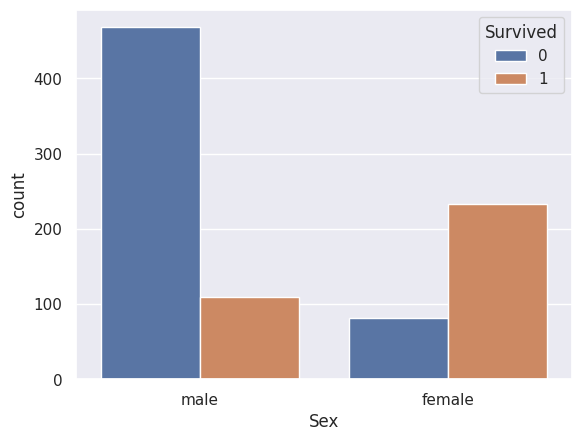

In [28]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

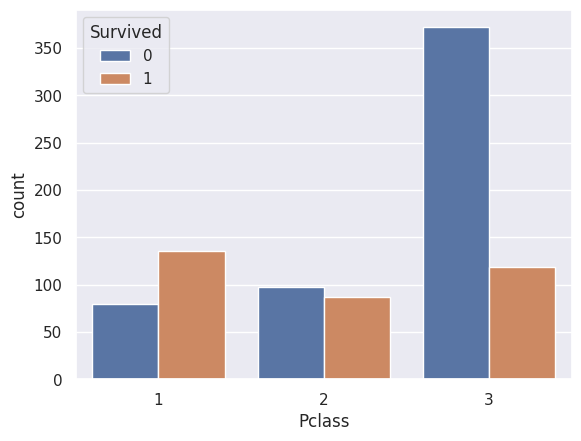

In [30]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

In [31]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
import cufflinks as cf
cf.go_offline()

<Axes: >

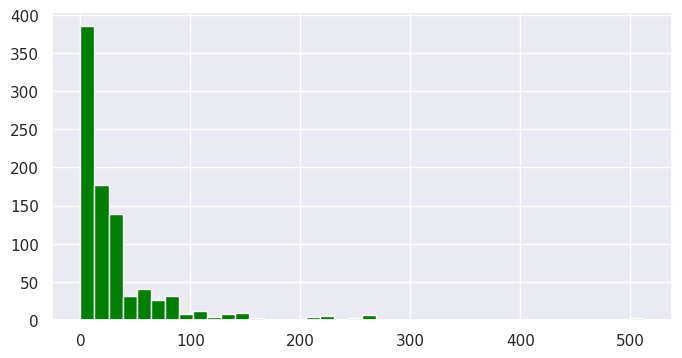

In [43]:
titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [45]:
titanic_data['Fare'].iplot(kind='hist',bins=30,color='green')

In [50]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [52]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

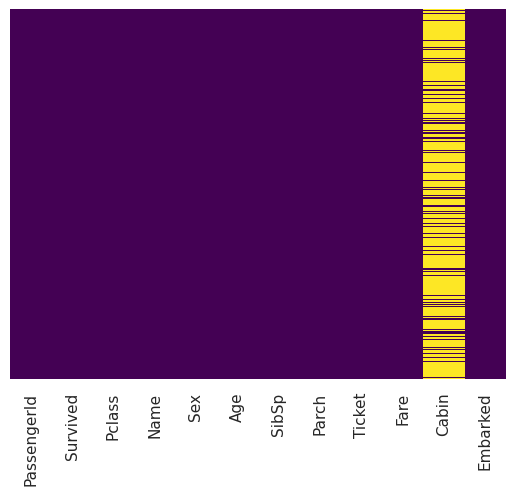

In [53]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [56]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:

X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop('Survived',axis=1),
                                                    titanic_data['Survived'], test_size=0.30,
                                                    random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()

In [80]:
print(X_train.head())

     PassengerId  Pclass                               Name     Sex   Age  \
520          521       1              Perreault, Miss. Anne  female  30.0   
510          511       3           Daly, Mr. Eugene Patrick    male  29.0   
446          447       2  Mellinger, Miss. Madeleine Violet  female  13.0   
2              3       3             Heikkinen, Miss. Laina  female  26.0   
691          692       3                 Karun, Miss. Manca  female   4.0   

     SibSp  Parch            Ticket     Fare Embarked  
520      0      0             12749  93.5000        S  
510      0      0            382651   7.7500        Q  
446      0      1            250644  19.5000        S  
2        0      0  STON/O2. 3101282   7.9250        S  
691      0      1            349256  13.4167        C  


In [81]:
print(y_train.head())

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64
